In [1]:
import numpy as np
import pocomc as pc

In [2]:
d = np.load("../results.npz", allow_pickle=True)
results = d["results"][()]
true_params = d["true_params"][()]

In [9]:
bins = list(results.keys())
nfg = list(results[bins[0]].keys())
best = []  # nfg with max evidence

for b in bins:
    print(f"Bin {b}:")
    print("----------")
    bic_min = np.inf
    for n in nfg:
        bic = results[b][n]["bic"]
        if bic < bic_min:
            bic_min = bic
            best_n = n
        print(f"nfg={n}, bic={bic:.3f}")
    best.append(best_n)
    print("\n")

Bin 0:
----------
nfg=4, log z=-36.877+-0.004
nfg=5, log z=-32.039+-0.005
nfg=6, log z=-32.582+-0.018
nfg=7, log z=-27.522+-0.017
nfg=8, log z=-25.293+-0.033


Bin 1:
----------
nfg=4, log z=-28.703+-0.004
nfg=5, log z=-28.615+-0.006
nfg=6, log z=-26.035+-0.014
nfg=7, log z=-19.744+-0.025
nfg=8, log z=-15.665+-0.020


Bin 2:
----------
nfg=4, log z=-44.268+-0.005
nfg=5, log z=-30.318+-0.005
nfg=6, log z=-26.669+-0.036
nfg=7, log z=-29.282+-0.021
nfg=8, log z=-19.573+-0.022


Bin 3:
----------
nfg=4, log z=-38.394+-0.004
nfg=5, log z=-29.105+-0.006
nfg=6, log z=-26.801+-0.014
nfg=7, log z=-21.707+-0.015
nfg=8, log z=-19.298+-0.018


Bin 4:
----------
nfg=4, log z=-33.050+-0.005
nfg=5, log z=-42.417+-0.005
nfg=6, log z=-30.394+-0.010
nfg=7, log z=-27.182+-0.010
nfg=8, log z=-26.956+-0.027


Bin 5:
----------
nfg=4, log z=-49.435+-0.005
nfg=5, log z=-24.444+-0.006
nfg=6, log z=-26.835+-0.015
nfg=7, log z=-27.034+-0.018
nfg=8, log z=-13.669+-0.037


Bin 6:
----------
nfg=4, log z=-46.616+-

In [18]:
def print_stats(results):
    estimated_params = np.mean(results['samples'], axis=0)
    std_vals = np.std(results['samples'], axis=0)
    print('Mean values = ', estimated_params)
    print('Standard deviation values = ', std_vals)
    print()
    print(f"Relative errors %: {100 * np.abs(1 - np.array(list(true_params.values())) /estimated_params)}")
    print(f"Number of sigmas from truth: {np.abs(estimated_params-np.array(list(true_params.values())))/std_vals}")

def plot(r, labels=["a", "w", "$\\nu_{21}$"]):
    _ = pc.plotting.run(r, width=7, height=7)
    _ = pc.plotting.trace(r, labels=labels)
    _ = pc.plotting.corner(r, labels=labels, truths=list(true_params.values()), truth_color="k")

In [21]:
for i in range(len(results)):
    r = results[i][best[i]]
    print_stats(r)
    print("------------")

Mean values =  [-0.24079093 21.205755   78.95923   ]
Standard deviation values =  [0.02449872 1.2034521  0.30010578]

Relative errors %: [16.94039422  5.6859811   1.31811253]
Number of sigmas from truth: [1.66502319 1.00191376 3.46801545]
------------
Mean values =  [-0.241623 21.255686 79.21535 ]
Standard deviation values =  [0.02309074 1.1296363  0.28095534]

Relative errors %: [17.22642275  5.90752901  0.99053117]
Number of sigmas from truth: [1.80258369 1.11158416 2.79280222]
------------
Mean values =  [-0.22538146 20.574024   79.25001   ]
Standard deviation values =  [0.02139866 1.113983   0.28157735]

Relative errors %: [11.26155778  2.79004338  0.94636252]
Number of sigmas from truth: [1.1861242  0.51528989 2.66353943]
------------
Mean values =  [-0.2491804 21.585255  78.78954  ]
Standard deviation values =  [0.02741197 1.2877064  0.32317725]

Relative errors %: [19.73686738  7.34415551  1.53631662]
Number of sigmas from truth: [1.79412148 1.23106843 3.74548906]
------------
M

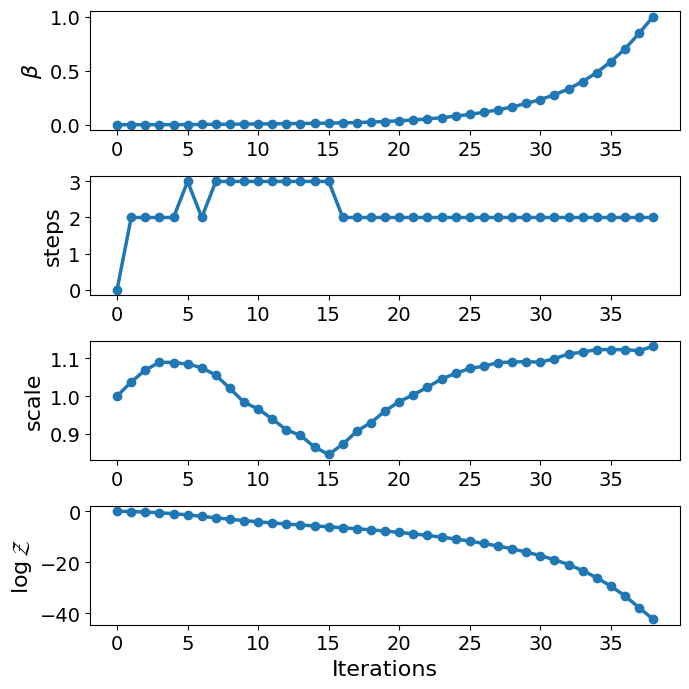

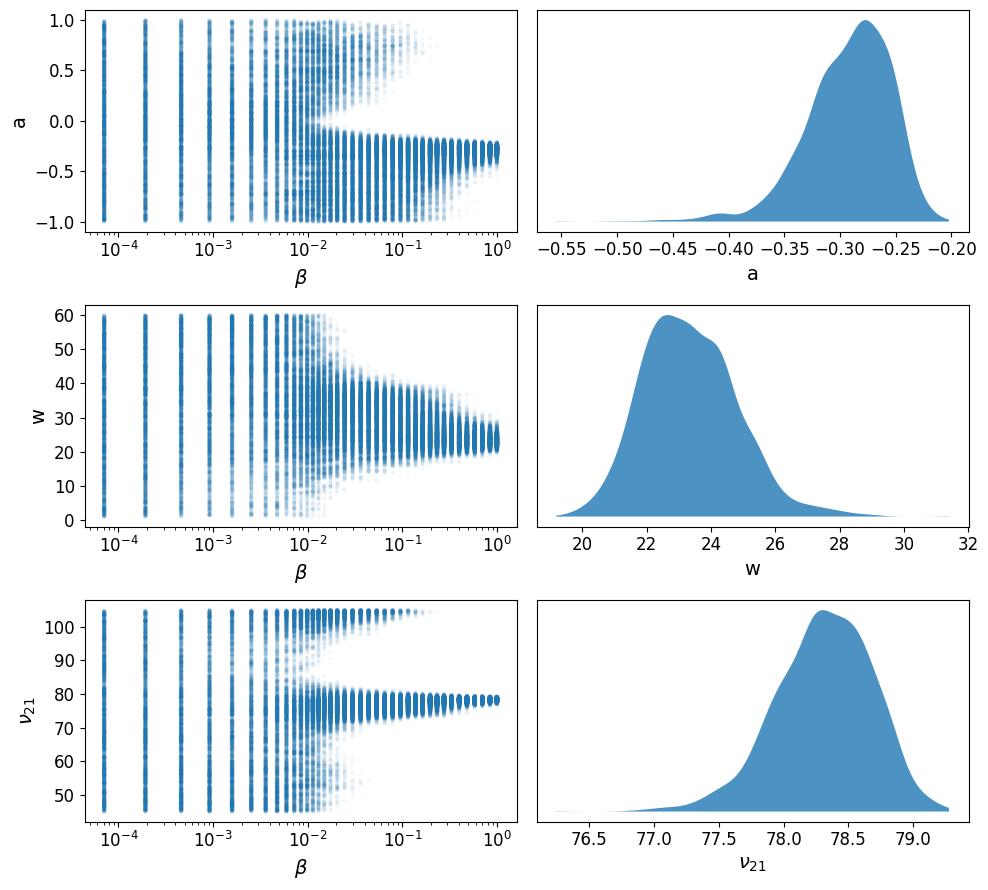

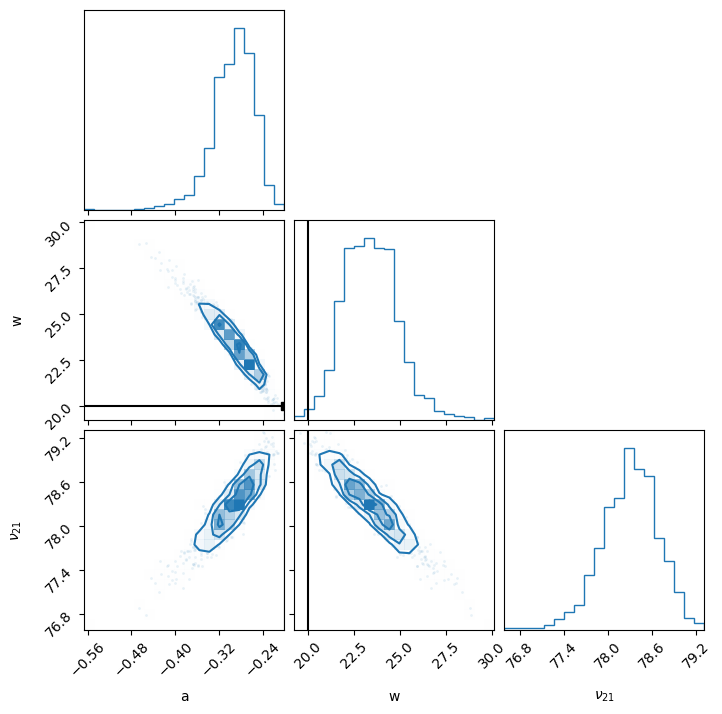

In [22]:
plot(r)